<a href="https://colab.research.google.com/github/Classymotion/Smilegate/blob/main/bayesian_with_pyro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q pyro-ppl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.5/732.5 kB 23.9 MB/s eta 0:00:00


Sample: 100%|██████████| 1200/1200 [00:20, 57.29it/s, step size=5.00e-01, acc. prob=0.943]


Inferred posterior mean: tensor(12.7986)
Inferred posterior std: tensor(13.6009)


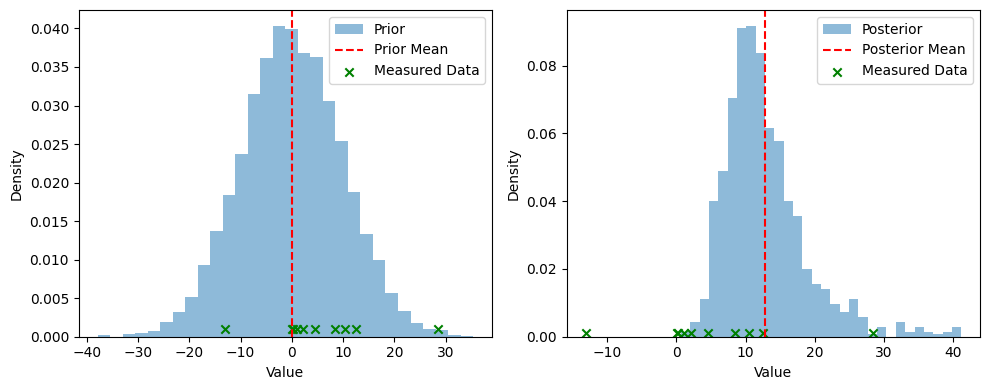

In [35]:
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import MCMC, NUTS
import matplotlib.pyplot as plt

# 측정 데이터
#data = torch.tensor([10, 15, 20])
data = dist.Normal(0, 10).sample((10,))

def model(data):
    # 사전 분포 (정규 분포)
    prior_mean = pyro.sample('prior_mean', dist.Normal(50, 10))
    prior_std = pyro.sample('prior_std', dist.HalfCauchy(1))
    
    # 관측 데이터와 정규 분포를 이용한 우도 계산
    with pyro.plate('data_plate'):
        pyro.sample('obs', dist.Normal(prior_mean, prior_std), obs=data)

def inference(data):
    nuts_kernel = NUTS(model)
    mcmc = MCMC(nuts_kernel, num_samples=1000, warmup_steps=200)
    mcmc.run(data)
    
    posterior_samples = mcmc.get_samples()
    return posterior_samples['prior_mean'], posterior_samples['prior_std']

# 사후 분포 추론 실행
posterior_mean, posterior_std = inference(data)

# 결과 출력
print("Inferred posterior mean:", posterior_mean.mean())
print("Inferred posterior std:", posterior_std.mean())

# 사전 분포와 사후 분포 시각화
plt.figure(figsize=(10, 4))

# 사전 분포
plt.subplot(1, 2, 1)
prior_samples = dist.Normal(0, 10).sample((10000,))
plt.hist(prior_samples.numpy(), bins=30, density=True, alpha=0.5, label='Prior')
plt.axvline(x=prior_samples.mean(), color='r', linestyle='--', label='Prior Mean')  # 사전 평균
plt.scatter(data, [OFFSET] * len(data), color='g', marker='x', label='Measured Data')  # 측정 데이터
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# 사후 분포
plt.subplot(1, 2, 2)
plt.hist(posterior_mean, bins=30, density=True, alpha=0.5, label='Posterior')
plt.axvline(x=posterior_mean.mean(), color='r', linestyle='--', label='Posterior Mean')  # 사후 평균
plt.scatter(data, [OFFSET] * len(data), color='g', marker='x', label='Measured Data')  # 측정 데이터
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


Sample: 100%|██████████| 1200/1200 [00:24, 49.63it/s, step size=3.50e-01, acc. prob=0.951]


data mean: tensor(-7.)
data std: tensor(2.1760)
Inferred posterior mean: tensor(-4.5453)
Inferred posterior std: tensor(3.4523)


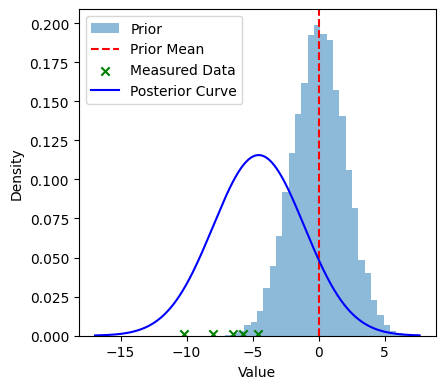

In [67]:
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import MCMC, NUTS
import matplotlib.pyplot as plt

# 측정 데이터
#data = torch.tensor([-4.6, 10.2, 6.5, 51.7, 8.0])
data = dist.Normal(10, 1).sample((20,))
# 사전 분포 (정규 분포)
prior_dist = dist.Normal(0, 2)
def model(data):
    
    prior_mean = pyro.sample('prior_mean', prior_dist)
    prior_std = pyro.sample('prior_std', dist.HalfCauchy(1))
    
    # 관측 데이터와 정규 분포를 이용한 우도 계산
    with pyro.plate('data_plate'):
        pyro.sample('obs', dist.Normal(prior_mean, prior_std), obs=data)

def inference(data):
    nuts_kernel = NUTS(model)
    mcmc = MCMC(nuts_kernel, num_samples=1000, warmup_steps=200)
    mcmc.run(data)
    
    posterior_samples = mcmc.get_samples()
    return posterior_samples['prior_mean'], posterior_samples['prior_std']

# 사후 분포 추론 실행
posterior_mean, posterior_std = inference(data)

# 결과 출력
print("data mean:", data.mean())
print("data std:", data.std())

print("Inferred posterior mean:", posterior_mean.mean())
print("Inferred posterior std:", posterior_std.mean())

# 사전 분포와 사후 분포 시각화
plt.figure(figsize=(12, 4))


plt.subplot(1, 3, 1)
# 사전 분포
prior_samples = prior_dist.sample((10000,))
plt.hist(prior_samples.numpy(), bins=30, density=True, alpha=0.5, label='Prior')
plt.axvline(x=prior_samples.mean(), color='r', linestyle='--', label='Prior Mean')  # 사전 평균
plt.scatter(data, [OFFSET] * len(data), color='g', marker='x', label='Measured Data')  # 측정 데이터
plt.xlabel('Value')
plt.ylabel('Density')

# 사후 분포 sampling
posterior_samples = dist.Normal(posterior_mean.mean(), posterior_std.mean()).sample((10000,))
posterior_prob = dist.Normal(posterior_mean.mean(), posterior_std.mean()).log_prob(posterior_samples).exp()
sorted_indices = posterior_samples.argsort()
sorted_samples = posterior_samples[sorted_indices]
sorted_prob = posterior_prob[sorted_indices]
plt.plot(sorted_samples.numpy(), sorted_prob.numpy(), 'b-', label='Posterior Curve')

plt.legend()
plt.tight_layout()
plt.show()


Sample: 100%|██████████| 1200/1200 [00:18, 66.49it/s, step size=6.66e-01, acc. prob=0.944]


data mean: tensor(10.0975)
data std: tensor(1.0130)
Inferred posterior mean: tensor(9.9514)
Inferred posterior std: tensor(1.0629)


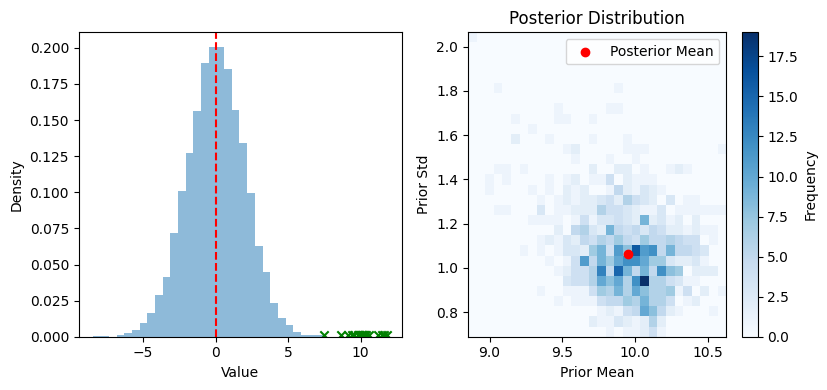

In [130]:
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import MCMC, NUTS
import matplotlib.pyplot as plt
import seaborn as sns

# 측정 데이터
data = dist.Normal(10, 1).sample((20,))

# 사전 분포 (정규 분포)
prior_dist = dist.Normal(0, 2)

def model(data):
    prior_mean = pyro.sample('prior_mean', prior_dist)
    prior_std = pyro.sample('prior_std', dist.HalfCauchy(1))

    # 관측 데이터와 정규 분포를 이용한 우도 계산
    with pyro.plate('data_plate'):
        pyro.sample('obs', dist.Normal(prior_mean, prior_std), obs=data)

def inference(data):
    nuts_kernel = NUTS(model)
    mcmc = MCMC(nuts_kernel, num_samples=1000, warmup_steps=200)
    mcmc.run(data)

    posterior_samples = mcmc.get_samples()
    return posterior_samples['prior_mean'], posterior_samples['prior_std']

# 사후 분포 추론 실행
posterior_mean, posterior_std = inference(data)

# 결과 출력
print("data mean:", data.mean())
print("data std:", data.std())
print("Inferred posterior mean:", posterior_mean.mean())
print("Inferred posterior std:", posterior_std.mean())

# 사전 분포와 사후 분포 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
# 사전 분포
prior_samples = prior_dist.sample((10000,))
plt.hist(prior_samples.numpy(), bins=30, density=True, alpha=0.5, label='Prior')
plt.axvline(x=prior_samples.mean(), color='r', linestyle='--', label='Prior Mean')  # 사전 평균
plt.scatter(data, [OFFSET] * len(data), color='g', marker='x', label='Measured Data')  # 측정 데이터
plt.xlabel('Value')
plt.ylabel('Density')

# 사후 분포 시각화
plt.subplot(1, 3, 2)
plt.hist2d(posterior_mean.numpy(), posterior_std.numpy(), bins=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.scatter(posterior_mean.mean(), posterior_std.mean(), color='r', marker='o', label='Posterior Mean')
plt.xlabel('Prior Mean')
plt.ylabel('Prior Std')
plt.title('Posterior Distribution')

plt.legend()
plt.tight_layout()
plt.show()


In [72]:
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import MCMC, NUTS

# 측정 데이터
data = torch.tensor([500.0, 650.0, 700.0])

# 사전 분포 (정규 분포)
prior_dist = dist.Normal(400, 80)
def model(data):
    prior_mean = pyro.sample('prior_mean', prior_dist)
    prior_std = pyro.sample('prior_std', dist.HalfCauchy(1))

    # 관측 데이터와 정규 분포를 이용한 우도 계산
    with pyro.plate('data_plate'):
        obs = pyro.sample('obs', dist.Normal(prior_mean, prior_std), obs=data)
    
    return obs

def inference(data):
    nuts_kernel = NUTS(model)
    mcmc = MCMC(nuts_kernel, num_samples=1000, warmup_steps=200)
    mcmc.run(data)

    posterior_samples = mcmc.get_samples()
    return posterior_samples['prior_mean'], posterior_samples['prior_std']

# 사후 분포 추론 실행
posterior_mean, posterior_std = inference(data)


Sample: 100%|██████████| 1200/1200 [00:36, 33.22it/s, step size=6.10e-01, acc. prob=0.918]


data mean: tensor(616.6667)
data std: tensor(104.0833)
Inferred posterior mean: tensor(519.0164)
Inferred posterior std: tensor(144.5356)


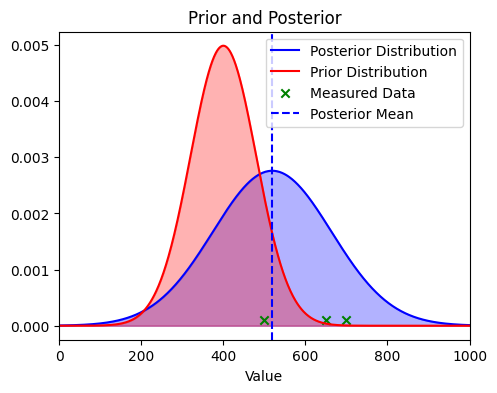

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 결과 출력
print("data mean:", data.mean())
print("data std:", data.std())
print("Inferred posterior mean:", posterior_mean.mean())
print("Inferred posterior std:", posterior_std.mean())

plt.figure(figsize=(18, 4))
OFFSET = 0.0001
'''
## No. 1 사전 분포와 관측 데이터
plt.subplot(1, 3, 1)
x = torch.linspace(0, 1000, 1000)
prior_dist = dist.Normal(400, 80)
pdf = prior_dist.log_prob(x).exp()
plt.plot(x.numpy(), pdf.numpy(), color = 'red', label='Prior Distribution')
plt.fill_between(x.numpy(), pdf.numpy(), color='red', alpha=0.3)
plt.scatter(data, [OFFSET] * len(data), color='g', marker='x', label='Measured Data')  # 측정 데이터
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Prior and Measured Data')
plt.legend()

## No. 2 사후 분포 시각화
plt.subplot(1, 3, 2)
plt.hist2d(posterior_mean.numpy(), posterior_std.numpy(), bins=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.scatter(posterior_mean.mean(), posterior_std.mean(), color='red', marker='o', label='Posterior Mean')
plt.xlabel('Posterior Mean')
plt.ylabel('Posterior Std')
plt.legend()
plt.title('Posterior Distribution')
'''
## No. 3 사전 분포와 사후 분포 비교
plt.subplot(1, 3, 3)
posterior_dist = dist.Normal(posterior_mean.mean(), posterior_std.mean())
posterior_pdf = posterior_dist.log_prob(x).exp()
plt.plot(x.numpy(), posterior_pdf.numpy(), color = 'blue', label='Posterior Distribution')
plt.fill_between(x.numpy(), posterior_pdf.numpy(), color='blue', alpha=0.3)
# 사전 분포
plt.plot(x.numpy(), pdf.numpy(), color = 'red', label='Prior Distribution')
plt.fill_between(x.numpy(), pdf.numpy(), color='red', alpha=0.3)
plt.scatter(data, [OFFSET] * len(data), color='g', marker='x', label='Measured Data')  # 측정 데이터
plt.xlim(0, 1000)
plt.xlabel('Value')
# 사후 분포
plt.axvline(x=posterior_mean.mean(), color='b', linestyle='--', label='Posterior Mean')  # 사후 평균
plt.title('Prior and Posterior')
plt.legend()


Sample: 100%|██████████| 1200/1200 [00:23, 51.44it/s, step size=8.92e-01, acc. prob=0.917]


data mean: tensor(14.9298)
data std: tensor(28.1470)
Inferred posterior mean: tensor(22.4913)
Inferred posterior std: tensor(29.2886)


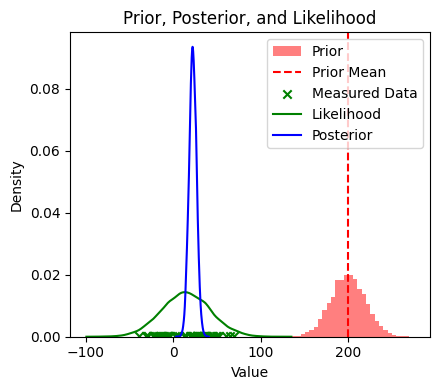

In [167]:
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import MCMC, NUTS
import matplotlib.pyplot as plt
import seaborn as sns

OFFSET = 0.0001

# 측정 데이터
#data = torch.tensor([144.6, -80.2, -16.5, 15.7])
data = dist.Normal(10, 30).sample((50,))

# 사전 분포 (정규 분포)
prior_dist = dist.Normal(200, 20)

def model(data):
    prior_mean = pyro.sample('prior_mean', prior_dist)
    prior_std = pyro.sample('prior_std', dist.HalfCauchy(1))

    # 관측 데이터와 정규 분포를 이용한 우도 계산
    with pyro.plate('data_plate'):
        obs = pyro.sample('obs', dist.Normal(prior_mean, prior_std), obs=data)
    
    return obs

def inference(data):
    nuts_kernel = NUTS(model)
    mcmc = MCMC(nuts_kernel, num_samples=1000, warmup_steps=200)
    mcmc.run(data)

    posterior_samples = mcmc.get_samples()
    return posterior_samples['prior_mean'], posterior_samples['prior_std']

# 사후 분포 추론 실행
posterior_mean, posterior_std = inference(data)

# 결과 출력
print("data mean:", data.mean())
print("data std:", data.std())
print("Inferred posterior mean:", posterior_mean.mean())
print("Inferred posterior std:", posterior_std.mean())

# 사전 분포와 사후 분포 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
# 사전 분포
prior_samples = prior_dist.sample((10000,))
plt.hist(prior_samples.numpy(), bins=30, density=True, alpha=0.5, color='red', label='Prior')
plt.axvline(x=prior_samples.mean(), color='r', linestyle='--', label='Prior Mean')  # 사전 평균
plt.scatter(data, [OFFSET] * len(data), color='g', marker='x', label='Measured Data')  # 측정 데이터

# 데이터 분포의 우도 시각화
likelihood_samples = dist.Normal(data.mean(), data.std()).sample((10000,))
sns.kdeplot(likelihood_samples.numpy(), color='green', label='Likelihood')

# 사후 분포 sampling
posterior_samples = dist.Normal(posterior_mean.mean(), posterior_mean.std()).sample((10000,))
posterior_prob = dist.Normal(posterior_mean.mean(), posterior_mean.std()).log_prob(posterior_samples).exp()
sns.kdeplot(posterior_samples.numpy(), color='blue', label='Posterior')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Prior, Posterior, and Likelihood')
plt.legend()

plt.tight_layout()
plt.show()